<a href="https://colab.research.google.com/github/LomaxOS/Genetic-Algorithm/blob/main/Lomax_Osomba_Genetic_Algorithm_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Genetic Algorithm Assignment
30% of the overall grade for this module

Marks indciated in sections below are based on percentage of marks allocated for this module

In this assignment you must choose a problem, and attempt to use the Genetic Alogrithm that we developed in class to solve this problem.





## The Problem         **(~30%)**

*   Description of the problem





---
Travelling Salesman Problem (TSP): Given a list of cities and distances between each pair of cities, find the shortest possible route by visiting each city exaclty once and returning to the starting city.

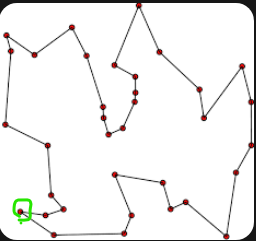

---



*   Discussion of the suitablity of Genetic Algorithms


------

Genetic algorithms (GAs) are effective for finding approximate solutions to optimisation and search problems through evolutionary processes such as crossover and mutation. In solving the TSP, GAs start by generating an initial population of routes that representes a list of cities. These routes are then evolved over successive generations, with the algorithm selecting and refining high-quality routes based on their fitness, which is measured by the total distance of the route. This process allows GAs to efficiently explore the solution space and find approximately the optimal routes for the TSP

------


*   Complexity of the problem  (Overall marks allocated based on ..)

# The problem and the cost function   **(~20%)**

In [ ]:
import numpy as np
import random
from copy import deepcopy

In [ ]:
#Return the distance of city pairs
def distance(from_City, to_City):

  xDistance = abs(from_City.x - to_City.x)
  yDistance = abs(from_City.y - to_City.y)
  distance = np.sqrt((xDistance ** 2) + (yDistance ** 2))

  return distance

In [ ]:
#City
class Problem:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return f"({self.x},{self.y})"

# The Individual **(~30%)**


*   Chromosone
*   Crossover
*   Mutation



## Discussion and justification on the approaches taken for the above

---

The chromosomes for the TSP are generated by creating a list of cities, with each city represented by its coordinates (x and y) encapsulated within the _Problem_ class. Solving the TSP aims finding the best solution, which is the shortest possible route that visits each city on the map exactly once and returning to the starting city. Therefore, the cost function of this specific problem is designed to calculate the total distance of a route by summing up the distances between consecutive city pairs, visited in a random sequence. This approach to the cost function is somewhat similar to using a weighted graph algorithm, where each edge connecting adjacent vertices (cities in this case) is assigned a value representing the distance between them. The Euclidean distance formula is employed to calculate the distances between city pairs.

The individual class, which is the _Map_, plays the role of creation chromosomes, which representes the routes. Each route is generated randomly on the map using the 'shuffle' function _(Thank you Robert :))_. The total distance is calculated by adding up distances between all pair of cities within the route. Additionally, the class also comprises the crossover and mutation functions, enabling to production of next generations.

The chosen Crossover mechanism for this problem is the Partially Mapped Problem (PMX), with the approach of utilising two perent solutions to generate two children. There are four distinct methods to generate children using this crossover, including:

- Divide the parent chromosomes into three segments by randomly selecting two positions between these chromosomes.

- Copy the middle segment of each parent to the corresponding position in the opposite child. This means the middle segment from the first parent is copied to the second child and the middle segment from the second parent is copied to the first child.

- Establish a mapping of the genes within the middle segments to identify their relationships. This is achieved using a dictionary data structure, which helps eliminating duplication by mapping the genes of the first parent's middle segment to those of the second parent's middle segment, and vice versa.

- Finally, Legalise the children chromosomes by eliminating duplicates in the left and right segments of both children. This is done by using the mapping established in the previous step to identify and replace any repeated genes outside the middle segment with their corresponding mapped values.

The Mutation mechanism employed in this problem is quite straightforward; it involves randomly selecting two cities and swapping their positions.

The reason fof choosing these approaches are as follow:

- Representing the cities as coordinate points facilitates the use of the Euclidean distance function, which is crucial for calculating distances between cities.
- The PMX is advantageous as it maintains the same order of genes across parents, which is useful given that each route is generated randomly.

- This mutation method simplifies the process; and enable an easy game of just select and swap :).


  _Source:_

- _https://smartroutes.io/blogs/the-travelling-salesman-problem/#:~:text=There%20are%20several%20algorithms%20to,cost%20for%20the%20remaining%20pathways._

- _https://www.baeldung.com/cs/ga-pmx-operator_


---



In [ ]:
# Code for individual class in here

class Map:
    def __init__(self, cities):
        self.chromosome = deepcopy(cities)
        np.random.shuffle(self.chromosome)
        self.cost = self.calculate_total_distance()



    #return total distance by visiting the route exactly once and return to the starting city
    def calculate_total_distance(self):
        total_distance = 0
        for city in range(len(self.chromosome)):

            from_City = self.chromosome[city]

            to_City = self.chromosome[(city + 1) % len(self.chromosome)]

            total_distance += distance(from_City, to_City)

        return total_distance

    #Partially Mapped Crossover (PMX)
    def crossover(self, parent_2):

        child_1 = deepcopy(self)
        child_2 = deepcopy(parent_2)

        #select points
        point_1 = np.random.randint(1, len(self.chromosome) - 50)
        point_2 = np.random.randint(point_1 + 1, len(self.chromosome) - 1)


        #divide parents' chromosomes by three segments (left, middle, right)
        lSegment_Parent1, mSegment_Parent1, rSegment_Parent1 = self.divide_into_segments(point_1, point_2)
        lSegment_Parent2, mSegment_Parent2, rSegment_Parent2 = parent_2.divide_into_segments(point_1, point_2)

        #exchanging middle genes
        child_1.chromosome[point_1:point_2] = mSegment_Parent2
        child_2.chromosome[point_1:point_2] = mSegment_Parent1


        #remove duplication
        self.remove_duplicate(child_2, mSegment_Parent2, mSegment_Parent1, point_1, point_2)
        parent_2.remove_duplicate(child_1, mSegment_Parent1, mSegment_Parent2, point_1, point_2)

        return child_1, child_2

    #return three segments of the chromosomes
    def divide_into_segments(self, point1, point2):
        leftSegment = self.chromosome[:point1]
        middleSegment = self.chromosome[point1:point2]
        rightSegment = self.chromosome[point2:]

        return leftSegment, middleSegment, rightSegment

    #removing duplicate
    def remove_duplicate(self, child, middleSegment_1, middleSegment_2, point_1, point_2):

      mapping = {middleSegment_1[i]: middleSegment_2[i] for i in range(len(middleSegment_1))}

      leftSegment = self.chromosome[:point_1]
      rightSegment = self.chromosome[point_2:]
      combinedSegments = leftSegment + rightSegment

      gapIndexes = list(range(point_1)) + list(range(point_2, len(self.chromosome)))

      for index, city in zip(gapIndexes, combinedSegments):
          original_city = city

          while city in child.chromosome or city in mapping:
              if city in mapping and city != mapping[city]:
                  city = mapping[city]
              else:
                  break

          # double-check duplicates
          if city in child.chromosome:

              for alternative_city in self.chromosome:
                  if alternative_city not in child.chromosome:
                      city = alternative_city
                      break

          child.chromosome[index] = city

    #rendomly select two cities to swap
    def mutate(self):

        city_1, city_2 = random.sample(range(len(self.chromosome)), 2)

        self.chromosome[city_1], self.chromosome[city_2] = self.chromosome[city_2], self.chromosome[city_1]




In [ ]:
"""
#verify duplicates cities - for testing

def check_duplicates(route):
    seen = set()
    for city in route:
        if city in seen:
            return True
        seen.add(city)
    return False

has_duplicates_child1 = check_duplicates(child_1.chromosome)
has_duplicates_child2 = check_duplicates(child_2.chromosome)

if has_duplicates_child1 or has_duplicates_child2:
    print("There are duplicates in the children")
else:
    print("No duplicates found")
"""

'\n#verify duplicates cities - for testing\n\ndef check_duplicates(route):\n    seen = set()\n    for city in route:\n        if city in seen:\n            return True  \n        seen.add(city)\n    return False  \n\nhas_duplicates_child1 = check_duplicates(child_1.chromosome)\nhas_duplicates_child2 = check_duplicates(child_2.chromosome)\n\nif has_duplicates_child1 or has_duplicates_child2:\n    print("There are duplicates in the children")\nelse:\n    print("No duplicates found")\n'

## Running the algorithm  **(~10%)**

*   Parameter choices
*   Modifications (if any) to run_genetic
*   Rationale for the above



---

(Double click then ...)  Type Here...

---



In [ ]:
#  Parameter here

class Parameters:
  def __init__(self):
    self.number_of_cities = 250
    self.population = 500
    self.number_of_generations = 100
    self.child_rate_per_generation = 1

In [ ]:
#return two unique random indices
def choose_indices_from(number_in_list):
  index_1 = np.random.randint(number_in_list)
  index_2 = np.random.randint(number_in_list)
  if index_1 == index_2:
    return choose_indices_from(number_in_list)
  return index_1,index_2

In [ ]:
# Run Genetic method here

def run_genetic(prob, params):

  number_in_population = params.population
  max_number_of_generations = params.number_of_generations
  number_of_children_per_generation = params.child_rate_per_generation * number_in_population


  # Generate initial population

  population = []

  #placeholder for best solution

  best_solution = Map(prob)
  best_solution.cost = np.infty
  for i in range(number_in_population):
    new_individual = Map(prob)
    population.append(new_individual)

    if new_individual.cost < best_solution.cost:
      best_solution = deepcopy(new_individual)

  #  Generational Iteration

  for _iteration in range(max_number_of_generations):

    # create children

    children = []

    while len(children) < number_of_children_per_generation:
      parent1_index , parent2_index = choose_indices_from(len(population))
      parent1 = population[parent1_index]
      parent2 = population[parent2_index]

      child1, child2 = parent1.crossover(parent2)
      child1.mutate()
      child1.cost = best_solution.cost
      child2.mutate()
      child2.cost = best_solution.cost

      # add children in list
      children.append(child1)
      children.append(child2)
      #end of the while loop

    # add the children to the population
    population += children
    # sort the population
    population = sorted(population, key = lambda x:x.cost)

    # cull population
    population = population[:number_in_population]

    # adjust the best solution
    if population[0].cost < best_solution.cost:
      best_solution = deepcopy(population[0])

    print("Best solution for iteraton "+ str(_iteration) +" has a cost of "+str(best_solution.cost))



  return population

In [ ]:
param = Parameters()

In [ ]:
#problem
p = [Problem(x=np.random.randint(0, 100), y=np.random.randint(0, 100)) for i in range(param.number_of_cities)]

In [ ]:
#  Running of the algorithm with outputs here
tsp = run_genetic(p,param)

In [ ]:
tsp[0].chromosome

In [ ]:
tsp[0].cost

In [ ]:
#  If changes to params or reruns of iterations dont overwrite, create more cells and copy code down to show evolution of final solution

## Results and conclusions    **(~10%)**

---

The results of this solution demonstrate the power of Genetic Algorithms in solving the TSP. The use of GAs for this assignment, which aims to find the shortest possible route connecting multiple cities, leverages the principles of natural selection and genetic diversit. This approach presentes significant challenges given the considerable challenge the TSP poses. Implementing GA components, such as generating random routes within the map and applying the partially mapped crossover, presented another challenges. Overcoming these obstacles necessitated a deep understanding of the TSP logic. In conclusion, while applying GAs to the TSP does not guarantee an optimal or even a satisfactory solution, since the total distance values of routes are calculated based on city pairs. Therefore, these values are known when the tour returns to the starting city. The GA simply ensures the basic correctness by applying its components to operate in generating valid offspring routes.

---

